
# Predict Diabetes Progression with Linear Regression

### Diabetes dataset

Ten baseline variables - **age, sex, body mass index, average blood
pressure, and six blood serum measurements** were obtained for each of 
n = 442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

**Number of Instances: 442**

**Number of Attributes: First 10 columns are numeric predictive values**

**Target: Column 11 is a quantitative measure of disease progression one year after baseline**

**Attribute Information:**
      **- Age**
      **- Sex**
      **- Body mass index**
      **- Average blood pressure**
      **- S1**
      **- S2**
      **- S3**
      **- S4**
      **- S5**
      **- S6**

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)


In [38]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

### Read Dataset

In [39]:
#------------------------------------------------------
# Import necessary library
#--------------------------------------------------
# Load the diabetes dataset
data = datasets.load_diabetes()

# Descrive the whole dataset
#print(data.DESCR)

# Get the features
diabetes_X = data.data
# Get the labels
y = data.target

print('\n Total number of samples = ', diabetes_X.shape[0])
print('\n The number of features = ', diabetes_X.shape[1])
#print('\n y.shape = ', y.shape)


 Total number of samples =  442

 The number of features =  10


In [40]:
df=pd.DataFrame(data.data)
df.columns= data.feature_names
# Creating a new column containing response variable 'y' (a quantitative measure of disease progressionone year after baseline)
df['diabetes_measure']=data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [41]:
# Creating the feature matrix X
X=df.iloc[:,:-1]
# Creating the response vector y
y=df.iloc[:,-1]

In [42]:
X.shape

(442, 10)

In [43]:
y.shape

(442,)

In [44]:
# Choosing 'bmi' as the only feature from the feature matrix X and reshaping the array to 2 dimensions
bmi = X.iloc[:,2]
bmi = bmi[:,np.newaxis]
# Choosing 'diabetes_measure' as the response variable and reshaping the array to 2 dimensions
y = df.iloc[:,-1]
y = y[:,np.newaxis]

### Build and Train a Simple Linear Regression Model

In [45]:
# importing the LinearRegression class from linear_model submodule of scikit learn
from sklearn.linear_model import LinearRegression
# instantiating
simple_lr = LinearRegression()
# Fitting the simple_lr object to the data
simple_lr = LinearRegression().fit(bmi,y)
# predicting the response values and saving them in an object called predicted_y
predicted_y = simple_lr.predict(bmi)

In [46]:
# Check the trained model parameters
# The intercept
print('\n Intercept (beta_0): \n', simple_lr.intercept_)
# The coefficients
print('\n Coefficients (beta_1): \n', simple_lr.coef_)


 Intercept (beta_0): 
 [152.13348416]

 Coefficients (beta_1): 
 [[949.43526038]]


### Plot the Decision Plane

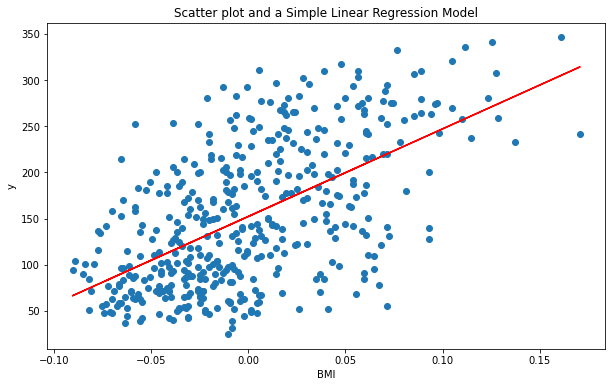

In [47]:
#-----------------------------------------------------
# Plot outputs
#-----------------------------------------------------
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, y)
plt.plot(bmi, predicted_y, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("BMI")
plt.show()

### Build a Multiple Linear Regression Model

### Build and Train the Model

In [48]:
# importing the LinearRegression class from linear_model submodule of scikit learn
from sklearn.linear_model import LinearRegression

# instantiating
multiple_lr = LinearRegression()

In [49]:
# Fitting the multiple_lr object to the data , this time using the whole feature matrix X
multiple_lr = LinearRegression().fit(X,y)

In [50]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
mse= cross_val_score(multiple_lr,X,y,scoring='neg_mean_squared_error',cv=10)
# taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-3000.3810328390514

In [51]:
# Check the trained model parameters
# The intercept
print('\n Intercept (beta_0): \n', multiple_lr.intercept_)
# The coefficients
print('\n Coefficients (beta_1): \n', multiple_lr.coef_)


 Intercept (beta_0): 
 [152.13348416]

 Coefficients (beta_1): 
 [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]


In [52]:
# Saving an array containing all the ten coefficients
multiple_lr_coeffs = multiple_lr.coef_[0]
multiple_lr_coeffs

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [53]:
# fetching feature names from the dataframe df
feature_names = data.feature_names
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

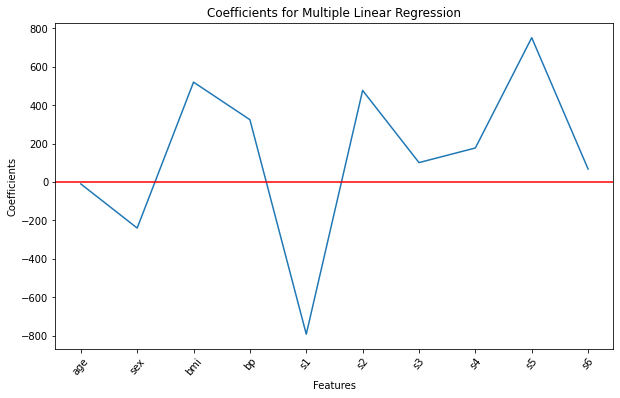

In [54]:
# Using matplotlib commands to plot
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.show()

## Why Regularize?

One of the basic assumptions of a multiple linear regression model is that there should be no (or very less) multicollinearity among the feature variables. This essentially means that the feature variables should ideally have no or very less correlation with each other.

A high correlation between the two feature variables gives rise to several problems. If we include one of them in the model, adding the other will have little or no impact on improving the model, but will only make the model more complex.

This goes against the principle of 'parsimony' in model building, which dictates that a simpler model with fewer variables is always preferred to a more complex model with too many features. 

In such a case the whole OLS model becomes less reliable as the coefficient estimates have high variance, i.e. they do not generalize well to unseen data(also called the problem of overfitting).

The correlations among all the feature variables can be visualized with the help of a correlation matrix using the following commands:

In [55]:
df = pd.DataFrame(diabetes_X, columns=data.feature_names)

df.corr().style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


The above matrix shows **correlations among the features** such that **darker shades of red implying high positive correlation and darker shades of blue implying high negative correlations**.

In the multiple linear models we built in the previous section, both features **s1 and s2 came out as important features**.
However, we can see that **they have a very high positive correlation of about 0.896**. This is clearly inducing multicollinearity into the model.

To counter such issues, we can use **regularization techniques** which allow us to **lower this variance of the model at the cost of adding some bias into it**, such that the total error is reduced. 

**Lower variance implies that the problem of overfitting is tackled automatically, as the model generalizes well to unseen data after regularization**.

The regularization techniques work by **adding penalty factors to the original OLS cost function such that high coefficient values are penalized, taking them closer to zero**.

The features with significant coefficient values are identified after a regularization procedure and other insignificant features with near-zero coefficient values can be dropped. This also leads to what is called natural features selection, resulting in an overall parsimonious model.

There are many regularization techniques, of which we discuss the three most commonly used ones viz. **Ridge, Lasso** and **Elastic Net** in the next part.

In [56]:
# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV

In [57]:

# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X,y).best_params_)

# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.04}
The best score for the best Ridge estimator is: -2997.186793719345


We see that regularizing our multiple linear regression model using Ridge regression, increases the average 'neg_mean_squared_error' from almost -3000.38 to about -2995.94, which is a moderate improvement.

Let us visualize all the ten coefficient estimates for the ridge regression model using the following commands:

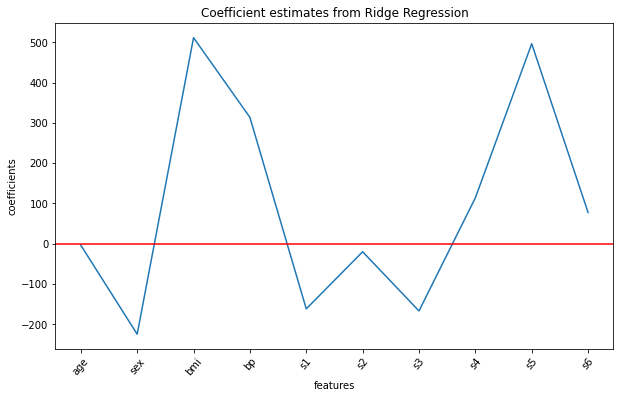

In [58]:
# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=0.04)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X,y).coef_

# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(data.feature_names)),best_ridge_coeffs[0])
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

Previously, features s1 and s2 came out as an important feature in the multiple linear regression, however, their coefficient values are significantly reduced after ridge regularization. The features 'bmi' and s5 still remain important.

## Apply LASSO

In [59]:
# importing the Lasso class from linear_model submodule of scikit learn
from sklearn.linear_model import Lasso
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',lasso.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Lasso estimator is:',lasso.fit(X,y).best_score_)

The best value of alpha is: {'alpha': 0.06}
The best score for the best Lasso estimator is: -2987.4180821246437


We see that using Lasso regularization produces slightly better results as compared to the Ridge regularization, i.e. increases the average 'neg_mean_squared_error' from almost -3000.38 to about -2986.37 (compared to -2995.94 from Ridge regularization).

Let us visualize all the ten coefficient estimates for the Lasso regression model using the following commands:

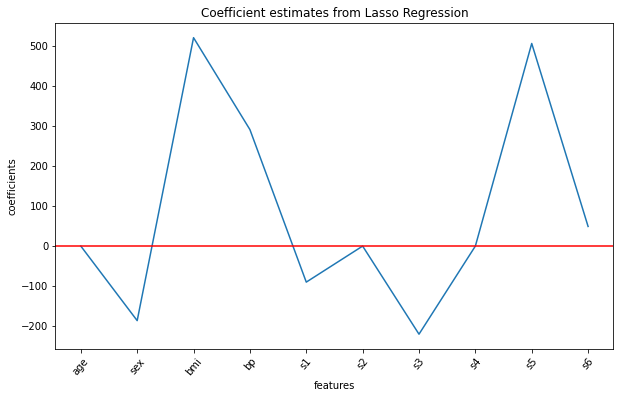

In [60]:
# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha=0.06)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X,y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [61]:
best_lasso_coeffs

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

## Apply Elastic Net

In [62]:
# from sklearn.model_selection import GridSearchCV # If not already imported
from sklearn.linear_model import ElasticNet
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic= GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

Let us now take a peek at the best values for hyperparameters alpha and l1_ratio (and the best score from Elastic Net regularization):

In [63]:
elastic.fit(X,y).best_params_

{'alpha': 0.06, 'l1_ratio': 1}

In [64]:
elastic.fit(X,y).best_score_

-2987.4180821246437

In this case, the best l1_ratio turns out to be 1, which is the same as a Lasso regularization. Consequently, the best score also remains the same as obtained from Lasso regularization earlier.